# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

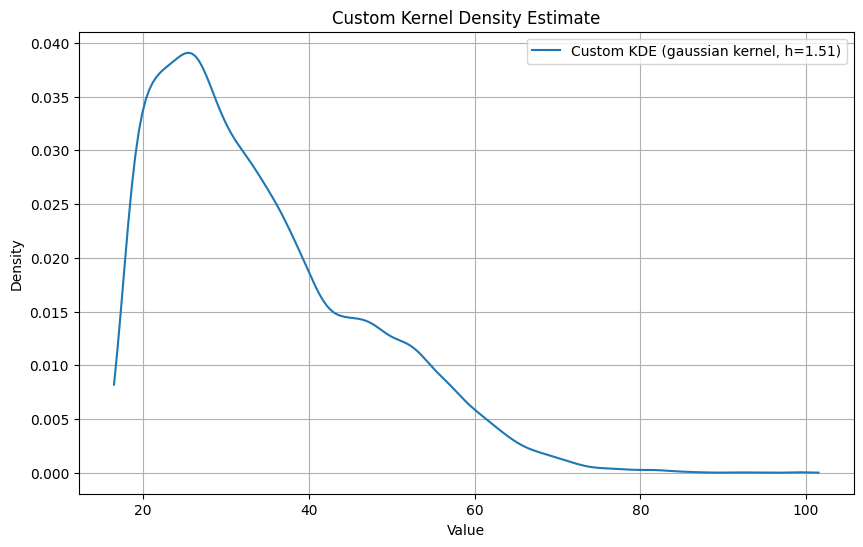

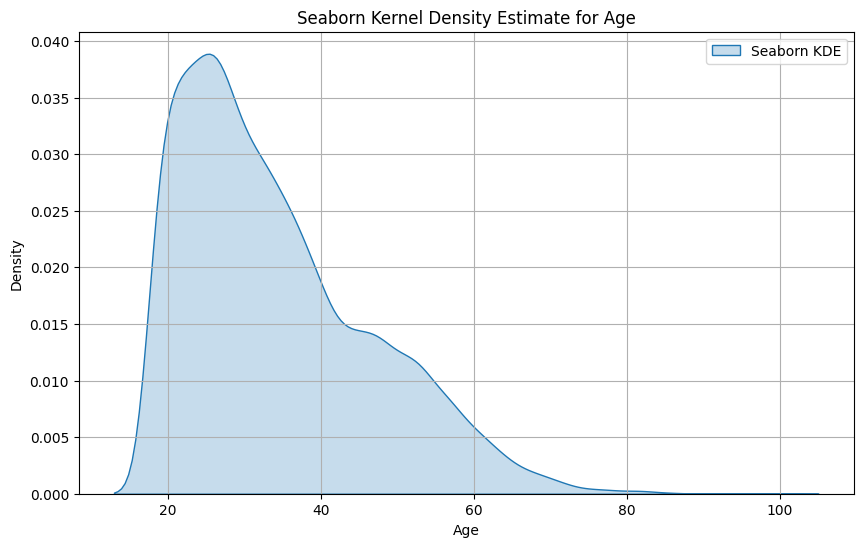

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, cdist


#Calculating Silverman's rule of thumb bandwidth
def silverman_bandwidth(data):
  n = len(data)
  iqr = np.percentile(data, 75) - np.percentile(data, 25)
  std_dev = np.std(data)
  A = min(std_dev, iqr / 1.34)
  bandwidth = 0.9 * A * (n ** -0.2)
  return bandwidth

#Creating custom Kernel Density Plot function
def custom_kdeplot(data, kernel='gaussian', bandwidth='silverman'):

  if not isinstance(data, (pd.Series, np.ndarray)):
    raise ValueError("Input data must be a Pandas Series or Numpy array.")

  data = np.asarray(data)
  n = len(data)

  if bandwidth == 'silverman':
    h = silverman_bandwidth(data)
  else:
    h = bandwidth

  #Creating a range of points to evaluate the KDE
  x_min, x_max = data.min() - h, data.max() + h
  x = np.linspace(x_min, x_max, 200) # Increased resolution for smoother plot

  #Broadcasting!!!
  z = (x[:, None] - data) / h

  #Calculating the kernel density estimate
  if kernel == 'gaussian':
    # Gaussian kernel function
    kde = np.sum((1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2), axis=1) / (n * h)
  elif kernel == 'uniform':
    # Uniform/Bump kernel function
    kde = np.sum(0.5 * ((np.abs(z) <= 1).astype(float)), axis=1) / (n * h)
  elif kernel == 'epanechnikov':
    # Epanechnikov kernel function
    kde = np.sum(0.75 * (1 - z**2) * ((np.abs(z) <= 1).astype(float)), axis=1) / (n * h)
  else:
    raise ValueError("Invalid kernel type. Choose from 'gaussian', 'uniform', or 'epanechnikov'.")


  plt.figure(figsize=(10, 6))
  plt.plot(x, kde, label=f'Custom KDE ({kernel} kernel, h={h:.2f})')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.title('Custom Kernel Density Estimate')
  plt.legend()
  plt.grid(True)


#Loading the pretrial data
try:
    pretrial_df = pd.read_csv('/content/pretrial_data.csv')
except FileNotFoundError:
    print("pretrial_data.csv not found. Please make sure it's in the correct directory.")
    pretrial_df = None

if pretrial_df is not None:
    # Example usage with pretrial data (using 'Age' column as an example)
    custom_kdeplot(pretrial_df['age'].dropna())

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=pretrial_df, x='age', fill=True, label='Seaborn KDE') # Corrected column name to 'age'
    plt.title('Seaborn Kernel Density Estimate for Age')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [7]:
#Loading the college completion data

college_df = pd.read_csv('/content/college_completion.csv')

#Checking the dimensions of the data
print("dimensions:", college_df.shape)

#Getting the number of observations
print("number of observations:", college_df.shape[0])

#Listing the variables included
for col in college_df.columns:
    print("-", col)

#The first few rows of data
display(college_df.head())

dimensions: (3798, 63)
number of observations: 3798
- index
- unitid
- chronname
- city
- state
- level
- control
- basic
- hbcu
- flagship
- long_x
- lat_y
- site
- student_count
- awards_per_value
- awards_per_state_value
- awards_per_natl_value
- exp_award_value
- exp_award_state_value
- exp_award_natl_value
- exp_award_percentile
- ft_pct
- fte_value
- fte_percentile
- med_sat_value
- med_sat_percentile
- aid_value
- aid_percentile
- endow_value
- endow_percentile
- grad_100_value
- grad_100_percentile
- grad_150_value
- grad_150_percentile
- pell_value
- pell_percentile
- retain_value
- retain_percentile
- ft_fac_value
- ft_fac_percentile
- vsa_year
- vsa_grad_after4_first
- vsa_grad_elsewhere_after4_first
- vsa_enroll_after4_first
- vsa_enroll_elsewhere_after4_first
- vsa_grad_after6_first
- vsa_grad_elsewhere_after6_first
- vsa_enroll_after6_first
- vsa_enroll_elsewhere_after6_first
- vsa_grad_after4_transfer
- vsa_grad_elsewhere_after4_transfer
- vsa_enroll_after4_transfer
- vs

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [9]:
#Cross tabulating 'control' and 'level'
cross_tab = pd.crosstab(college_df['control'], college_df['level'])
display(cross_tab)
#Private and non for profit colleges are normally four year institutions, while public and for profit institutions are more balanced. There are more 4 year colleges in total too.

Cross-tabulation of Control and Level:


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


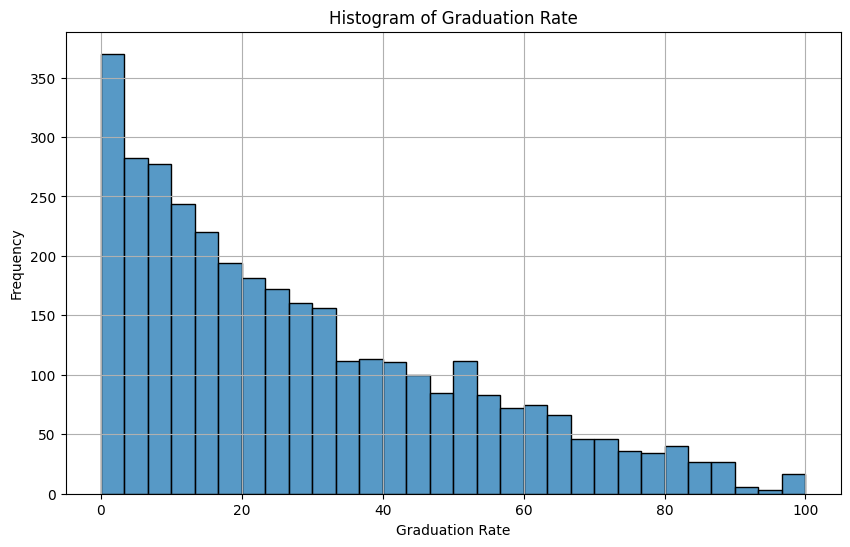

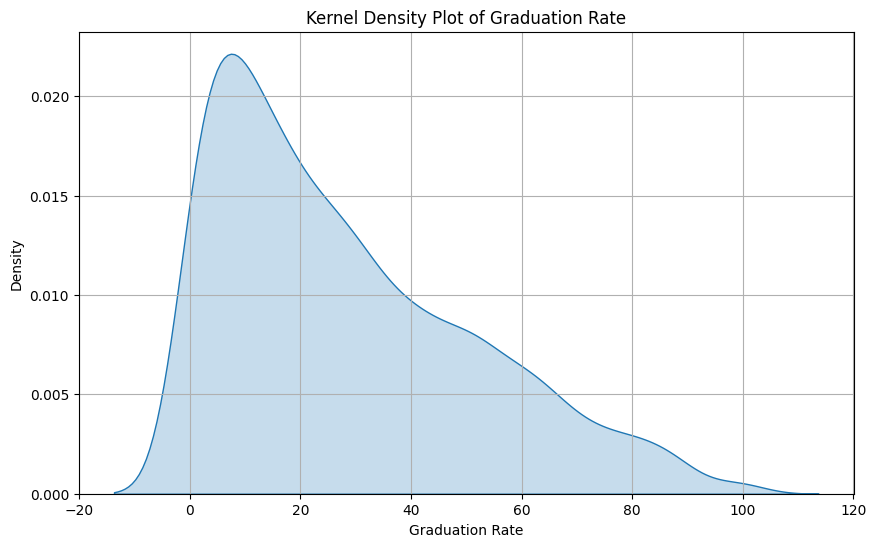

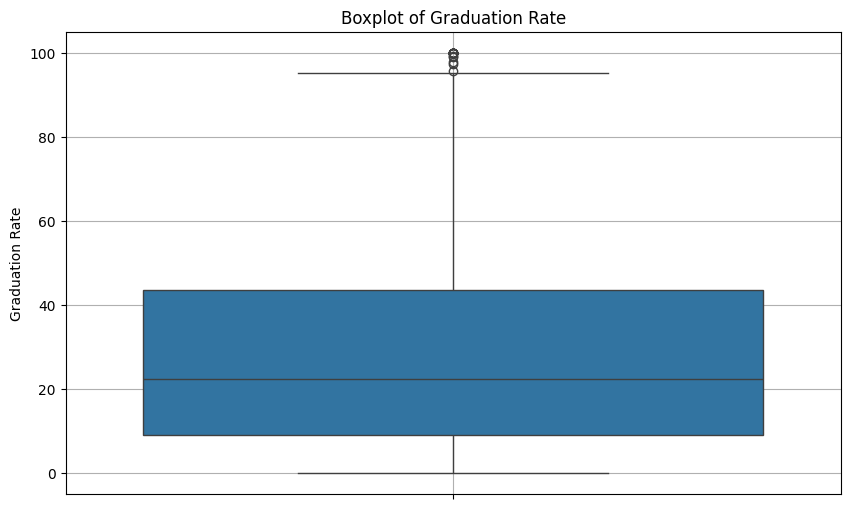

In [11]:
#Statistical description
display(college_df['grad_100_value'].describe())

#Creating histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=college_df, x='grad_100_value', kde=False, bins=30)
plt.title('Histogram of Graduation Rate')
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Creating kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=college_df, x='grad_100_value', fill=True)
plt.title('Kernel Density Plot of Graduation Rate')
plt.xlabel('Graduation Rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#Creating boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=college_df, y='grad_100_value')
plt.title('Boxplot of Graduation Rate')
plt.ylabel('Graduation Rate')
plt.grid(True)
plt.show()

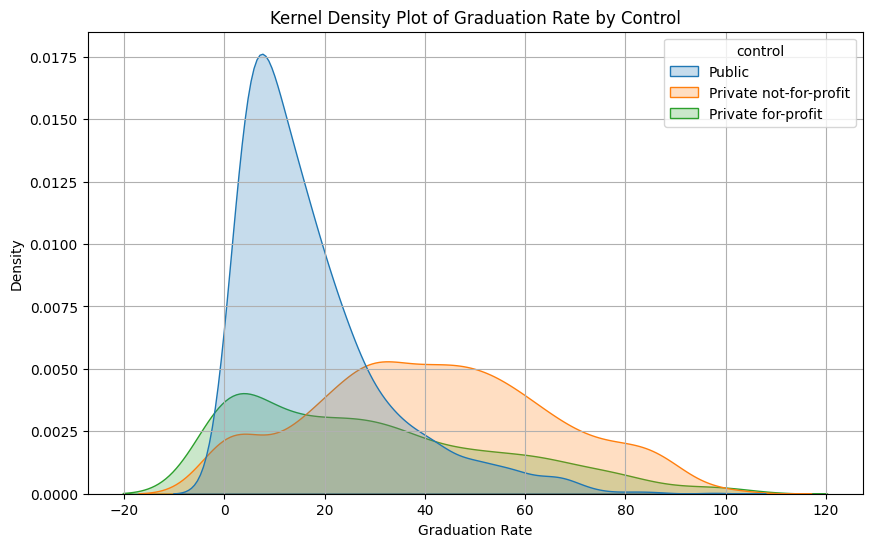

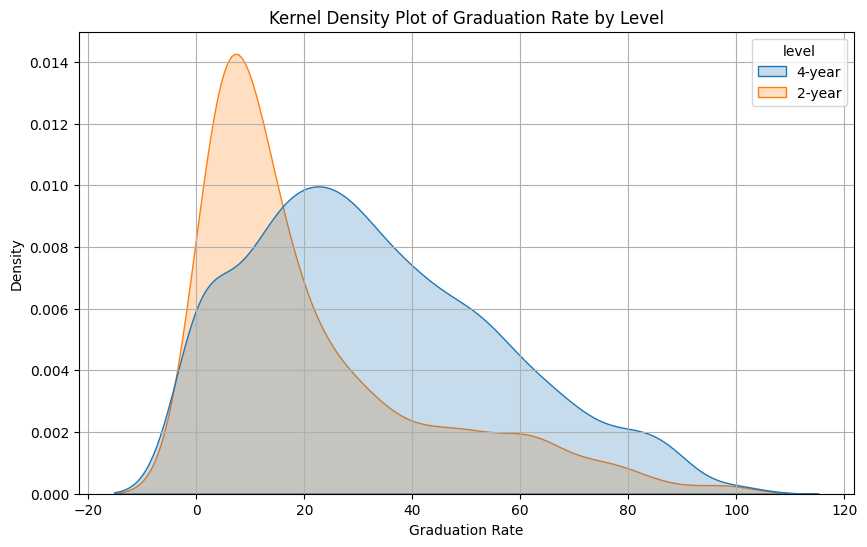

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0


,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [13]:
#Creating grouped kernel density plot by control
plt.figure(figsize=(10, 6))
sns.kdeplot(data=college_df, x='grad_100_value', hue='control', fill=True)
plt.title('Kernel Density Plot of Graduation Rate by Control')
plt.xlabel('Graduation Rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#Creating grouped kernel density plot by level
plt.figure(figsize=(10, 6))
sns.kdeplot(data=college_df, x='grad_100_value', hue='level', fill=True)
plt.title('Kernel Density Plot of Graduation Rate by Level')
plt.xlabel('Graduation Rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#Grouped statistical descriptions of grad_100_value by level
display(college_df.groupby('level')['grad_100_value'].describe())

#Grouped statistical descriptions of grad_100_value by control
display(college_df.groupby('control')['grad_100_value'].describe())
#The graduation rates of public universities are far lover than private, with not for profit having the highest peak kernel density.

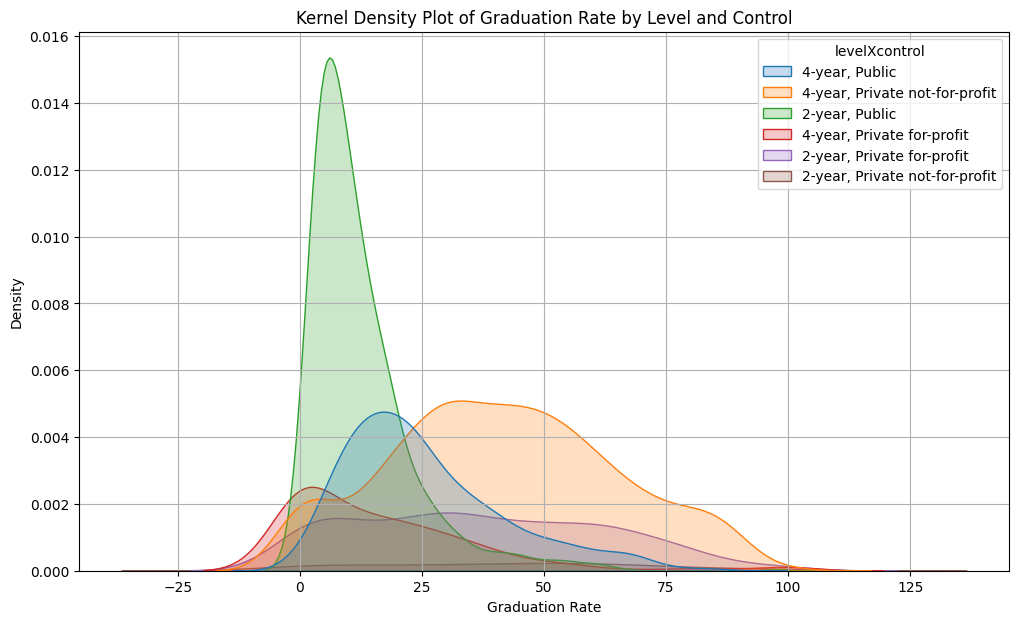

,count,mean,std,min,25%,50%,75%,max
levelXcontrol,,,,,,,,
"2-year, Private for-profit",461.0,37.197614,25.497380,0.0,15.800,33.9,57.800,100.0
"2-year, Private not-for-profit",68.0,41.913235,28.348302,0.0,16.225,44.4,61.200,100.0
"2-year, Public",926.0,12.400000,10.893600,0.0,5.100,9.4,16.175,97.8
"4-year, Private for-profit",318.0,17.382704,20.788525,0.0,0.000,12.5,26.325,100.0
"4-year, Private not-for-profit",1121.0,41.645674,23.243453,0.0,25.000,41.0,57.800,100.0
"4-year, Public",573.0,25.561082,16.403902,0.0,13.600,21.8,33.800,86.3


In [16]:
#Creating a new variable combining level and control
college_df['levelXcontrol'] = college_df['level'] + ', ' + college_df['control']

#Creating grouped kernel density plot by levelXcontrol
plt.figure(figsize=(12, 7))
sns.kdeplot(data=college_df, x='grad_100_value', hue='levelXcontrol', fill=True)
plt.title('Kernel Density Plot of Graduation Rate by Level and Control')
plt.xlabel('Graduation Rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#Grouped statistical descriptions of grad_100_value by levelXcontrol
display(college_df.groupby('levelXcontrol')['grad_100_value'].describe())
#Four year not for profit private schools seem to have the best graduation rates of any of these types.

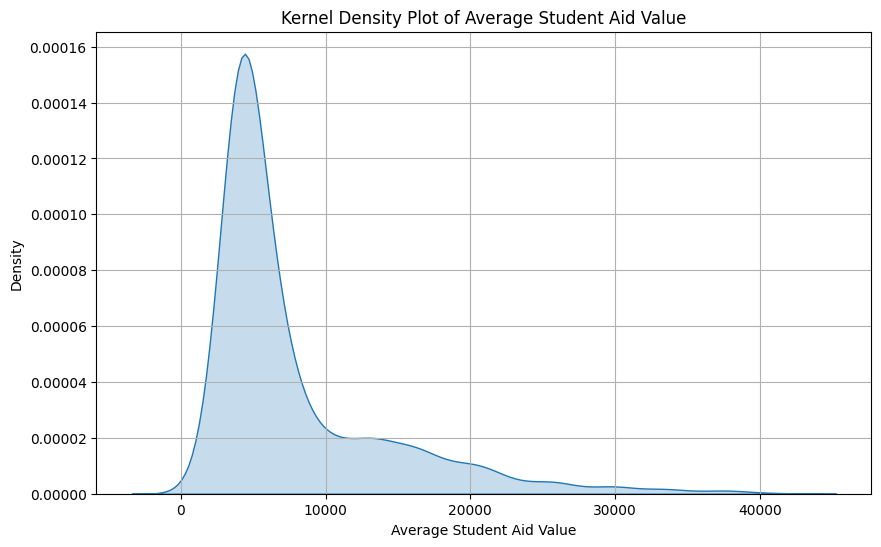

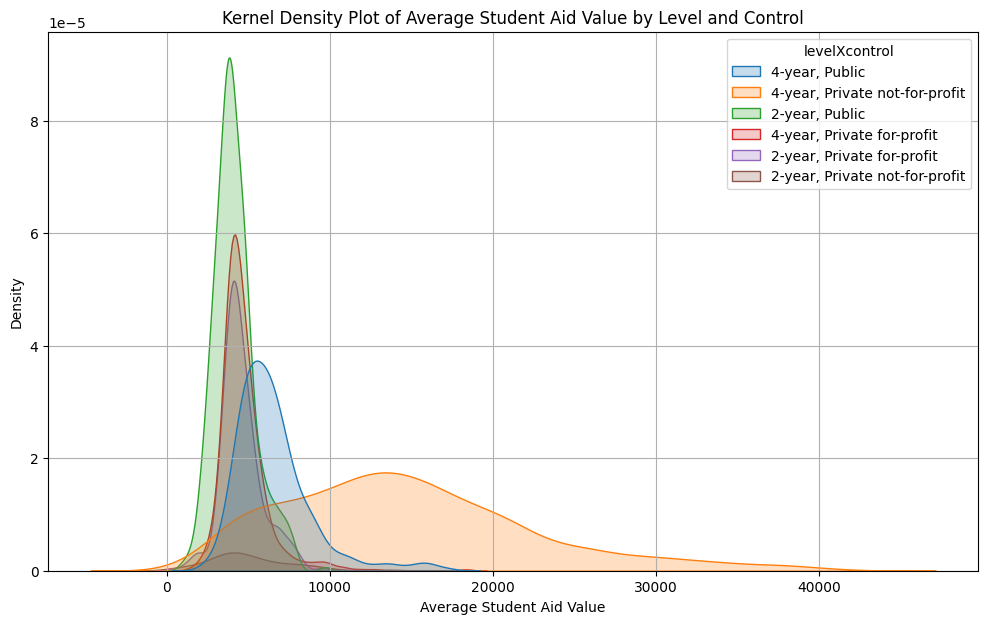

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

In [19]:
#Creating kernel density plot of aid_value
plt.figure(figsize=(10, 6))
sns.kdeplot(data=college_df, x='aid_value', fill=True)
plt.title('Kernel Density Plot of Average Student Aid Value')
plt.xlabel('Average Student Aid Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#Creating grouped kernel density plot of aid_value by level and control
plt.figure(figsize=(12, 7))
sns.kdeplot(data=college_df, x='aid_value', hue='levelXcontrol', fill=True)
plt.title('Kernel Density Plot of Average Student Aid Value by Level and Control')
plt.xlabel('Average Student Aid Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#Grouped statistical descriptions of aid_value by level and control
display(college_df.groupby(['level', 'control'])['aid_value'].describe())
#Private not for profit 4 year institutions have a much higher mean aid value compared to public and for profit institutions, especially when compared to two year institutions.

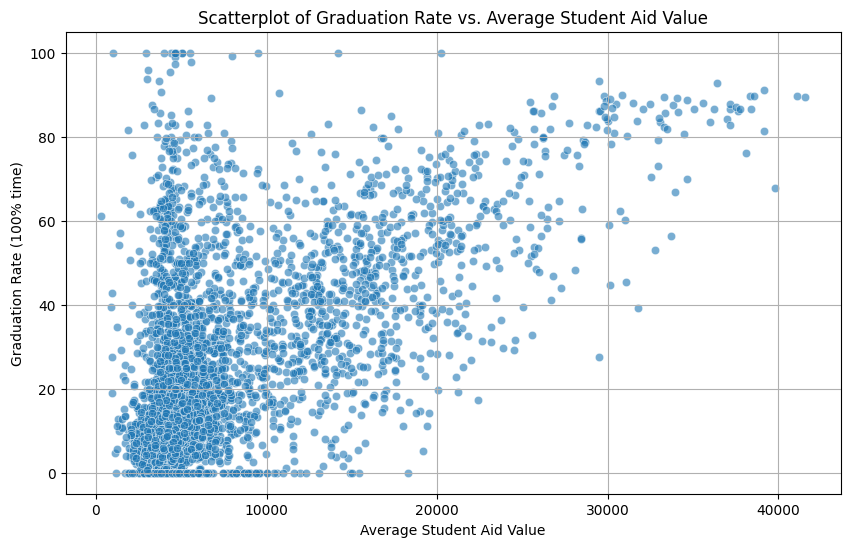

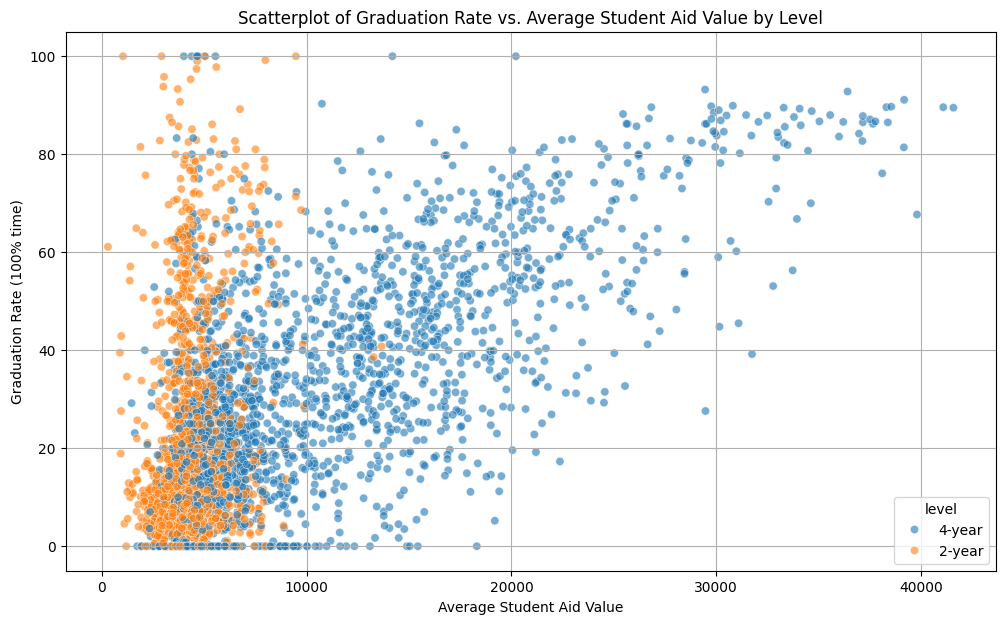

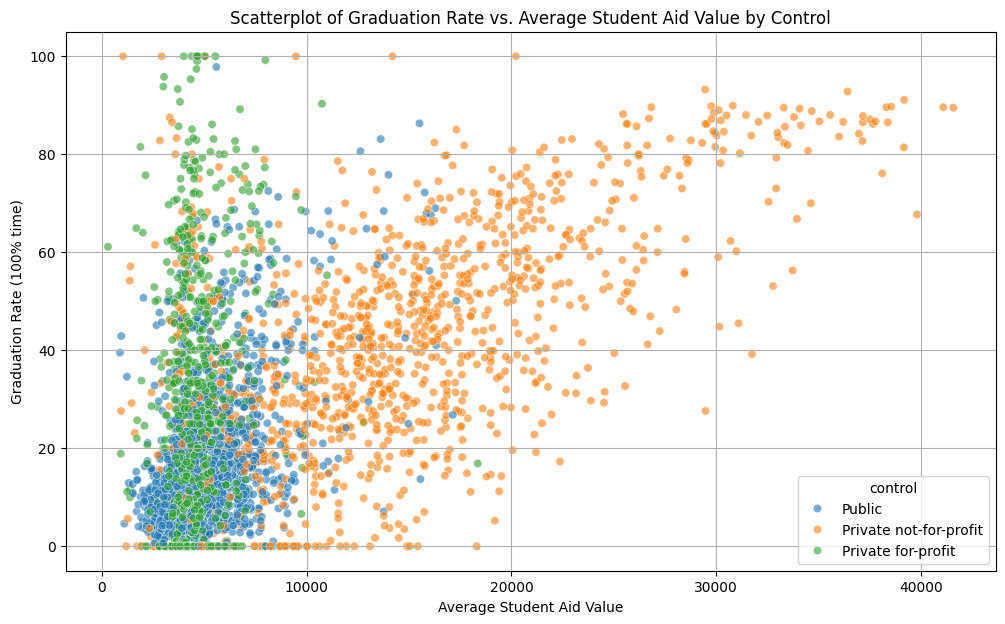

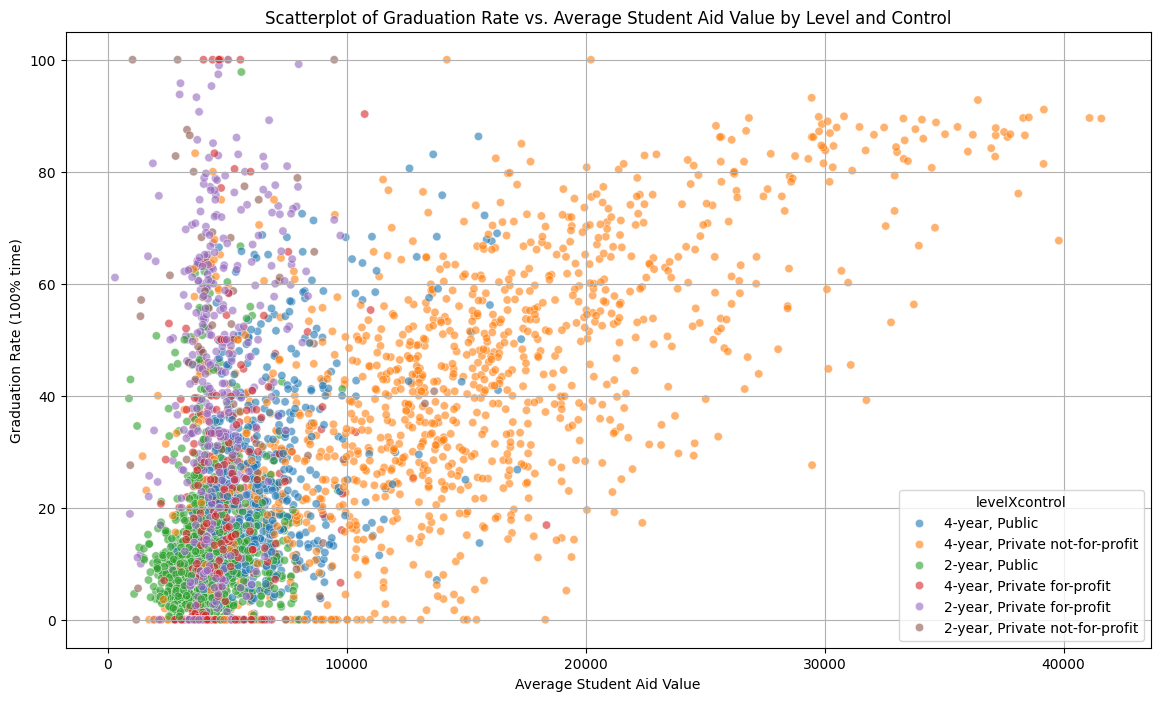

In [20]:
#Analyzing the relationship between grad_100_value and 'aid_value'

#Creating scatterplot of grad_100_value by aid_value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=college_df, x='aid_value', y='grad_100_value', alpha=0.6)
plt.title('Scatterplot of Graduation Rate vs. Average Student Aid Value')
plt.xlabel('Average Student Aid Value')
plt.ylabel('Graduation Rate (100% time)')
plt.grid(True)
plt.show()

#Creating scatterplot of grad_100_value by aid_value grouped by level
plt.figure(figsize=(12, 7))
sns.scatterplot(data=college_df, x='aid_value', y='grad_100_value', hue='level', alpha=0.6)
plt.title('Scatterplot of Graduation Rate vs. Average Student Aid Value by Level')
plt.xlabel('Average Student Aid Value')
plt.ylabel('Graduation Rate (100% time)')
plt.grid(True)
plt.show()

#Creating scatterplot of grad_100_value by aid_value grouped by control
plt.figure(figsize=(12, 7))
sns.scatterplot(data=college_df, x='aid_value', y='grad_100_value', hue='control', alpha=0.6)
plt.title('Scatterplot of Graduation Rate vs. Average Student Aid Value by Control')
plt.xlabel('Average Student Aid Value')
plt.ylabel('Graduation Rate (100% time)')
plt.grid(True)
plt.show()

#Creating scatterplot of grad_100_value by aid_value grouped by levelXcontrol
plt.figure(figsize=(14, 8))
sns.scatterplot(data=college_df, x='aid_value', y='grad_100_value', hue='levelXcontrol', alpha=0.6)
plt.title('Scatterplot of Graduation Rate vs. Average Student Aid Value by Level and Control')
plt.xlabel('Average Student Aid Value')
plt.ylabel('Graduation Rate (100% time)')
plt.grid(True)
plt.show()

#Aid increases graduation rates almost specifically for 4 year, not for profit private institutions, every other type of school showed a much weaker correlation with no direct relationship identifiable by the data alone.